In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
vvix = pd.read_excel("resource/vvix_data.xlsx")

In [23]:
working_data = vvix.iloc[0:3500]

### Data inspect

In [25]:
working_data.set_index("Date", inplace=True)

In [44]:
columns_fix = ['SPXT','VIX', 'SPVXSP', 'SPVXSTR', 'SPVXMP', 'SPVXMTR', 'UVXY',
       'UVXY.i', 'SVXY', 'SVXY.i (2x)', '.5 return SVXY', 'ZIV', 'ZIV.i',
       'VXX ', 'VXX.i', 'SLOPE', 'VXXBEN', 'Inverse UVXY', 'VIX 126', 'VVIX',
       'CSFB', 'SKEW', 'CSFB-', 'SLOPE 200 day', 'VXXBEN 200 day',
       'VIX 200 day', '1.5x UVXY']

In [45]:
working_data.columns = columns_fix

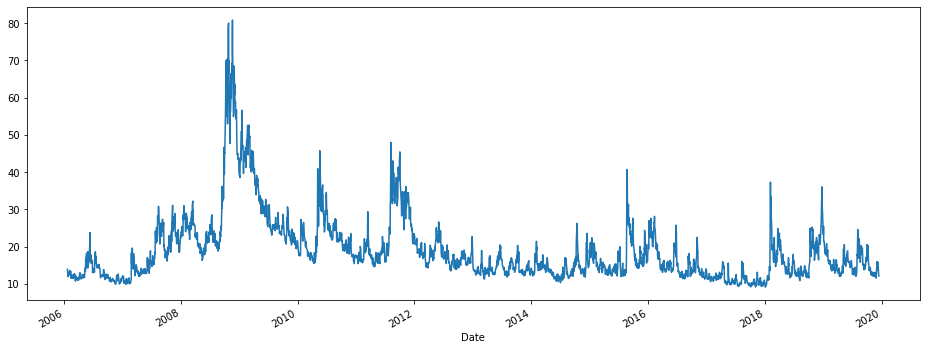

In [46]:
working_data["VIX"].plot(figsize = (16,6))

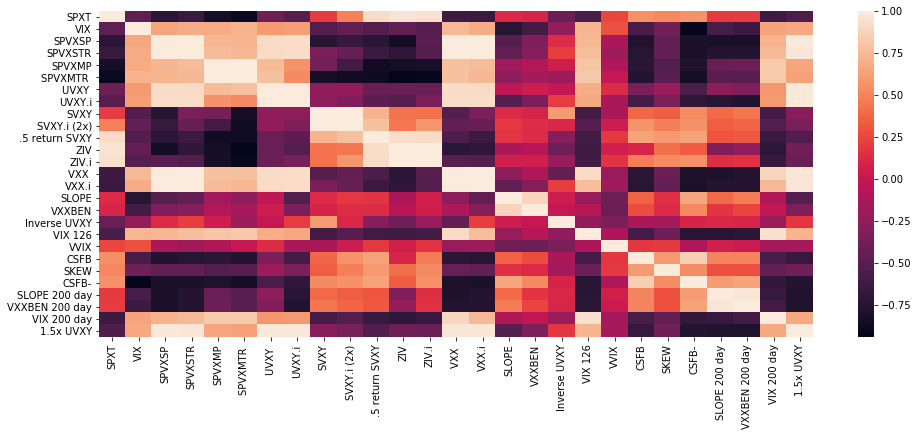

In [43]:
plt.figure(figsize=(16,6))
sns.heatmap(working_data.corr())

### Appears that ZIV as a strong inverse coorelation to SPVXSP,  S&P500 SHORT TERM FUTURES INDEX
- we'll take a look at how these move in conjunction with each other using the daily changes

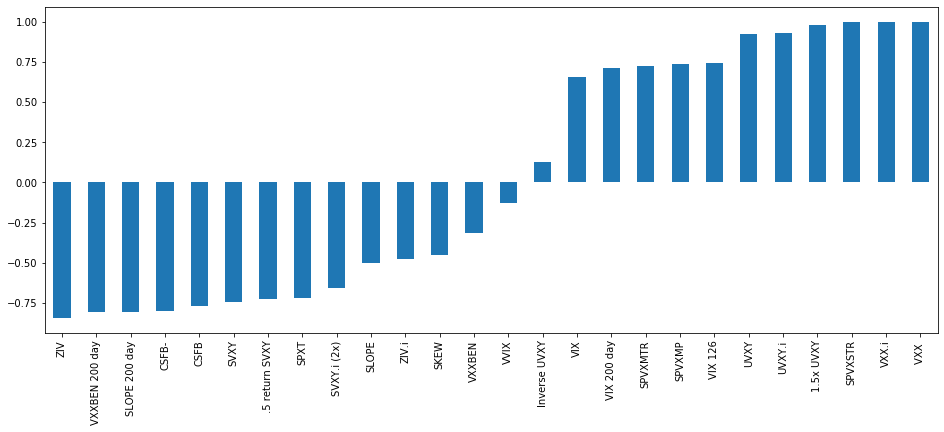

In [55]:
working_data.corr()["SPVXSP"].sort_values()[:-1].plot(kind="bar", figsize = (16,6))

In [57]:
for t in columns_fix:
    working_data[f"{t} daily change"] = working_data[f"{t}"].pct_change()

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
working_data.corr()["VVIX daily change"].sort_values()

SVXY daily change             -0.702342
Inverse UVXY daily change     -0.657646
.5 return SVXY daily change   -0.657646
ZIV.i daily change            -0.574550
ZIV daily change              -0.571499
SVXY.i (2x) daily change      -0.570105
SPXT daily change             -0.477341
VXXBEN                        -0.143967
CSFB daily change             -0.134963
SKEW daily change             -0.098564
SLOPE                         -0.081996
CSFB-                         -0.028363
CSFB- daily change            -0.022557
SLOPE daily change            -0.022145
VXXBEN 200 day daily change   -0.021101
VIX 126                       -0.018276
VIX 200 day                   -0.014327
SKEW                          -0.013492
VXX                           -0.012851
CSFB                          -0.012195
SPXT                          -0.011115
.5 return SVXY                -0.009409
SPVXMTR                       -0.009395
UVXY                          -0.005533
SLOPE 200 day daily change    -0.005236


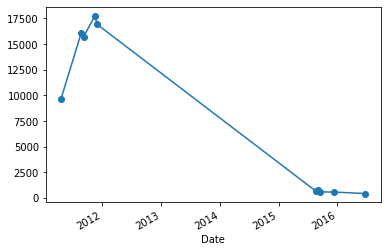

In [84]:
working_data[working_data["ZIV daily change"] * 100  < -6]["SPVXSP"].plot(marker = "o")

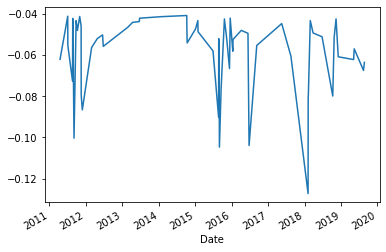

In [80]:
working_data[working_data["ZIV daily change"] * 100  < -4]["ZIV daily change"].plot()

In [81]:
working_data[working_data["ZIV daily change"] * 100  < -4]["SPVXSP"]

Date
2011-04-19     9659.69
2011-07-05     7352.13
2011-07-06     7465.14
2011-08-22    16052.59
2011-08-24    14887.31
2011-08-26    14987.49
2011-09-06    15712.41
2011-09-27    17347.34
2011-10-10    16846.07
2011-11-02    16199.24
2011-11-16    17206.54
2011-11-17    17784.44
2011-11-28    16938.71
2012-02-29     9064.65
2012-04-26     5927.79
2012-06-18     6082.00
2012-06-25     6248.13
2013-02-25     2414.13
2013-04-15     2000.40
2013-06-20     2066.07
2013-06-24     2121.06
2014-01-31     1160.30
2014-10-09      754.51
2014-10-10      840.91
2014-10-13      947.73
2015-01-05      778.31
2015-01-28      830.10
2015-01-30      845.85
2015-06-29      478.78
2015-08-24      612.82
2015-08-25      617.02
2015-08-28      595.75
2015-09-01      715.72
2015-09-18      573.04
2015-10-21      488.60
2015-11-12      484.80
2015-12-11      558.25
2015-12-18      520.22
2016-01-13      598.48
2016-01-15      630.90
2016-04-07      446.83
2016-06-13      392.57
2016-06-24      412.34
2016-0